In [571]:
# for deeper understanding refer hard notes

In [572]:
# so in this codes we generate non linear data
# and then we generate linear regression line and
# then we see that result is not good ....then we statrt
# apply polynomial regression from small degree to bigger degree
# we see that at one point error is getting lesse but after
# its becoming overfitting

In [573]:
#   question answer my curiosity

# In a graph, we plot the original data points (x vs y),
# not x² or polynomial features.
# So what’s the role of these polynomial features (like x², x³)?
# How does the model draw a curve using them if we don’t even plot them?

# solution

# Yes, you are right — we only plot the original data points, i.e., x vs y.
# But the polynomial features (like x square x cube )
# are used internally by the model to learn a curved pattern.


# example

# my original data
# x = [[1], [2], [3], [4], [5]]
# y = [20, 12, 9, 10, 25]

# we can plot using
# plt.scatter(x, y)



# 2. Add Polynomial Features:

# poly = PolynomialFeatures(degree=2)
# x_poly = poly.fit_transform(x)

# This will convert each x into [1, x, x²].

# If x = 2 → becomes [1, 2, 4]




# 3. Train the Model:

# we fit the model

# model = LinearRegression()
# model.fit(x_poly, y)

# The model learns:

# y =  θ₀ + θ₁ * x + θ₂ * x²



# 4. we Plots the Curve:

  # by using

# x_curve = np.linspace(1, 5, 100).reshape(-1, 1)
# x_curve_poly = poly.transform(x_curve)
# y_pred = model.predict(x_curve_poly)

# plt.scatter(x, y)              # original points
# plt.plot(x_curve, y_pred, c='red')  # predicted curve


# conclusion

# This draws a smooth red curve using the original x values —
#  but the curve shape was learned using x².


# most logical thinking points

# So the original data points are plotted in a curved pattern,
# and now a straight-line relationship
# between x and y can't define it properly.
# hat's why we use degree (polynomial features)
# to define the relationship using a curve —
# this is what you're trying to say, right?


# Polynomial regression lets us fit a curve to original data points,
# when x and y don’t follow a straight-line relationship.

# last conclusion :

#               we do adding poer on x just to make my line
#             curve at the original data points  by the helps of
#        curve line we could make  better relationship between
#     x  and y features


In [574]:
#                code has been started

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression , SGDRegressor
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


In [575]:
# here we are generating the datasets

x = 6*np.random.rand(200,1) - 3
y = 0.8*x**2 + 0.9*x + 2 + np.random.randn(200,1)
# y = 0.8^2 + 0.9x + 2

# and our target is to make my model which could predict
# like this eqaution ...
# so lets  try to achive this equation


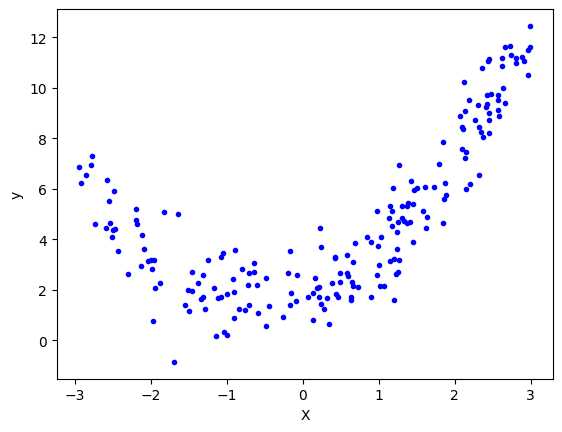

In [576]:
plt.plot(x , y , 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()
# generated data looks like this ...

In [577]:
from sklearn.model_selection import train_test_split


In [578]:
# train test split
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,
                                                      random_state=2)


In [579]:
# Applying linear regresison
lr = LinearRegression()

In [580]:
lr.fit(x_train , y_train)

LinearRegression()

In [581]:
y_pred = lr.predict(x_test)

r2_score(y_test , y_pred)*100

45.30345803579585

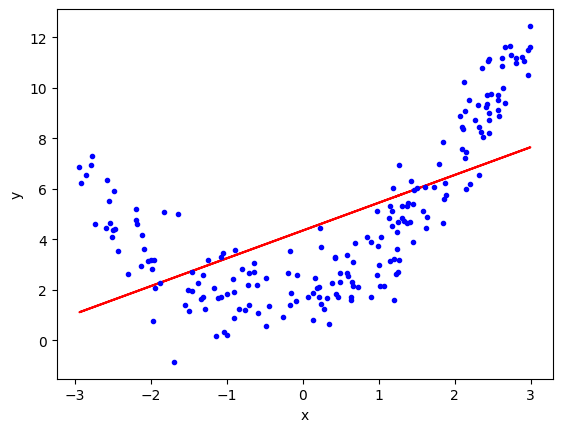

In [582]:
plt.plot(x_train ,lr.predict(x_train),color = 'r')
plt.plot(x, y ,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# plotted regression line for non linear line




In [583]:

# applying polynomial linear regression
# degree 2

poly = PolynomialFeatures(degree = 2 , include_bias = True)

# This line creates a PolynomialFeatures object that will generate
# polynomial features up to degree 2 (i.e., quadratic).

x_train_trans = poly.fit_transform(x_train)

# This line fits the polynomial transformer to the training
# data and transforms x_train by adding polynomial features.

x_test_trans = poly.transform(x_test)

# This line applies the same transformation
# (fitted on training data) to the test data.
# We only transform the test data,
# we don't fit on it, to avoid data leakage.

# also we transform means degree only inputs data not the outputs
# data

# also train test transformation have to apply on both




# We use PolynomialFeatures(degree=n) to create
# extra features like x sqaure x cube etc.

# Then we apply Linear Regression on these transformed features.
# The model itself is still linear in terms of coefficients (m1, m2, m3...)

# But due to the transformed input (which now include x square x cube
  #                                it can fit in curve )

In [584]:
print(x_train[0])
# x_train original data is -1.97
print(x_train_trans[0])
# after transform we could see that x power 0 will be 1
# x power 1 will be -1.97 and x power 2 will be 3.90
# we could see here :

# so we have gotten more inputs after transforming in  original
# datasets..
# what we do is  to  again do train and test


[1.23117676]
[1.         1.23117676 1.51579622]


In [585]:

lr  = LinearRegression()
lr.fit(x_train_trans , y_train)

# now we train again the model


LinearRegression()

In [586]:
y_pred = lr.predict(x_test_trans)
# calculatinng the y pred on x_test transform

In [587]:
r2_score(y_test , y_pred)*100

# now extreme big improvement we could see here



89.40691803320165

In [588]:
print(lr.coef_)
print(lr.intercept_)

# from  above we pasted too here for better understanding
#  y = 0.8^2 + 0.9x + 2
# here


#  to achieve :

# 𝑚 = 0.9 (slope)
# b = 2.64(intercept)


# what we gotten

# after applying second degree we got
# below slopes and values
# x sqaure slope = 0.79 , x power 1 = 0.9 , x power 0 = 0
# intercept = 2.102

# here  by comaparing our  target  nad what we got till
# now  we are vert close to aur target

# we still not perfect becausae  there is random
# noise in our data


[[0.         0.93403832 0.85267157]]
[1.82932853]


In [589]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

#  here we  are generating the dataset of test  inputs...
#  means separte test data ...before 80 percent
#  prediction we got from the original input data
#  which we have  hidden the few inputs to test
#  and to pedict and finds our the accuracy .....

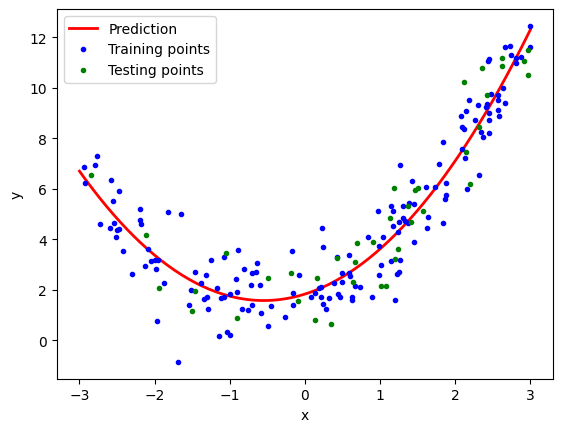

In [590]:
plt.plot(x_new , y_new ,"r-" , linewidth = 2 , label = "Prediction")
plt.plot(x_train , y_train , "b." , label ='Training points')
plt.plot(x_test , y_test , "g." , label= 'Testing points')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# here we could see that my test data is very close
# to the prediction lines  .....


# important concepts


# Underfitting case

# When the model is too simple, it fails to capture
# the actual pattern of the data.
# For example: You give degree = 1 (a straight line),
# but the actual data follows a degree 3 curve →
# the model won't fit the data well.
# “The model is too dumb.”


   # overfitting  case

# When the model becomes too complex,
# it memorizes the training data instead of learning the actual pattern.
# For example: You give degree = 15 ,
# the red curve will pass through every training point,
# but it will fail badly on test data.
#  “The model is too smart for its own good.”


# conclusion ::
             #  if we underfit then prediction line may do not much pasas near
             #  to our data points ........

            #  if we overfit... then prediction  line may touch
            #  all the training data points and more to undertand the pattern
              #  it may learns the relationship between x and y
              #  like parrot....by this it wil not able to predict well
              #  on test data input ....



In [591]:
# here  our degree is 2  .......
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

     # at the degree 2 we get curve like this not much overfitting
     #  not much underfitting ....

  #    lets we increase the degree ...


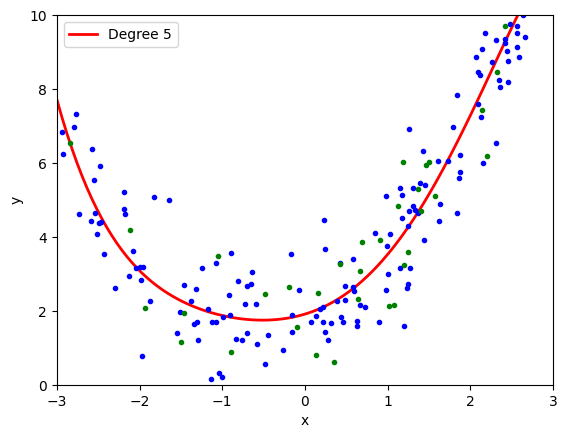

In [592]:
polynomial_regression(5)
# here we have increased the degree from 2 to 5
# but we couls see that not much impact on my plott


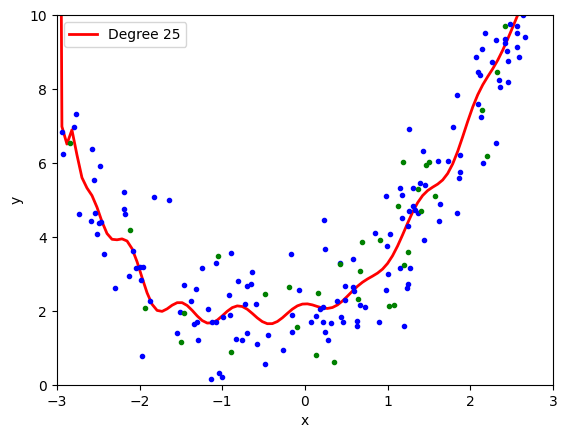

In [593]:
polynomial_regression(25)

# this is the case of underfitting and our  model will try to
# learn the x y relationship we have already discussed alot about it


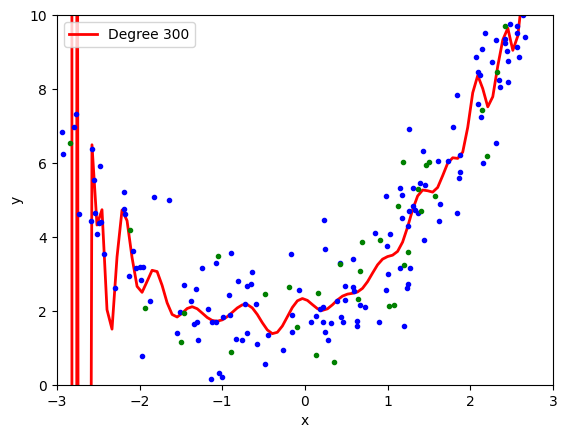

In [594]:
polynomial_regression(300)

# here extreme overfitted my curve line
# because curve line trying to touch each and very datapoints


# so by trying to touching  the dataset model
# literally it tryinh to remember the datat set and not
# able to pay aatention towards the pattern

In [595]:
# so far we have seen how underfitting overfitting happens
# while  giving degree in polynomial regression
# but it was in one inputs

# now we will see how model raects while having more than
# one inputs...


#                  more than one  input features we  are going
#              to see .....

In [596]:
# 3d polynomial regression
import numpy as np

x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8
z = x**2 + y**2 + 0.2*y + 0.1*x*y + 2 + np.random.random((100, 1))


# z = x**2 + y**2 + 0.2*y + 0.1*X*y + 2

In [597]:
import numpy as np

In [598]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df , x = x.ravel() , y = y.ravel() ,z = z.ravel())
fig.show()

# did this just to visualise the 3 dimension


In [599]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

# for visulaisation

In [600]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

# since we did not transform by incresing the power of my
# inputs feautures hence resultant happens in
# extreme underfitting of  prediction sheet ...

In [601]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [602]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming degree=2 to match output features close to 6
poly = PolynomialFeatures(degree=30)  # Changed degree from 30 to 2
X_multi_trans = poly.fit_transform(X_multi)

print("Input", poly.n_features_in_)  # Input features
print("Output", X_multi_trans.shape[1])  # Output features (should be 6)
print("Powers\n", poly.get_feature_names_out())  # Feature names

Input 2
Output 496
Powers
 ['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3'
 'x0^4' 'x0^3 x1' 'x0^2 x1^2' 'x0 x1^3' 'x1^4' 'x0^5' 'x0^4 x1'
 'x0^3 x1^2' 'x0^2 x1^3' 'x0 x1^4' 'x1^5' 'x0^6' 'x0^5 x1' 'x0^4 x1^2'
 'x0^3 x1^3' 'x0^2 x1^4' 'x0 x1^5' 'x1^6' 'x0^7' 'x0^6 x1' 'x0^5 x1^2'
 'x0^4 x1^3' 'x0^3 x1^4' 'x0^2 x1^5' 'x0 x1^6' 'x1^7' 'x0^8' 'x0^7 x1'
 'x0^6 x1^2' 'x0^5 x1^3' 'x0^4 x1^4' 'x0^3 x1^5' 'x0^2 x1^6' 'x0 x1^7'
 'x1^8' 'x0^9' 'x0^8 x1' 'x0^7 x1^2' 'x0^6 x1^3' 'x0^5 x1^4' 'x0^4 x1^5'
 'x0^3 x1^6' 'x0^2 x1^7' 'x0 x1^8' 'x1^9' 'x0^10' 'x0^9 x1' 'x0^8 x1^2'
 'x0^7 x1^3' 'x0^6 x1^4' 'x0^5 x1^5' 'x0^4 x1^6' 'x0^3 x1^7' 'x0^2 x1^8'
 'x0 x1^9' 'x1^10' 'x0^11' 'x0^10 x1' 'x0^9 x1^2' 'x0^8 x1^3' 'x0^7 x1^4'
 'x0^6 x1^5' 'x0^5 x1^6' 'x0^4 x1^7' 'x0^3 x1^8' 'x0^2 x1^9' 'x0 x1^10'
 'x1^11' 'x0^12' 'x0^11 x1' 'x0^10 x1^2' 'x0^9 x1^3' 'x0^8 x1^4'
 'x0^7 x1^5' 'x0^6 x1^6' 'x0^5 x1^7' 'x0^4 x1^8' 'x0^3 x1^9' 'x0^2 x1^10'
 'x0 x1^11' 'x1^12' 'x0^13' 'x0^12 x1' 'x0^11 x1^2'

In [603]:
print("Input shape:", X_multi.shape)  # (100, 2)
print("Transformed shape:", X_multi_trans.shape)  # (100, 6)
print("Feature names:", poly.get_feature_names_out())


Input shape: (100, 2)
Transformed shape: (100, 496)
Feature names: ['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3'
 'x0^4' 'x0^3 x1' 'x0^2 x1^2' 'x0 x1^3' 'x1^4' 'x0^5' 'x0^4 x1'
 'x0^3 x1^2' 'x0^2 x1^3' 'x0 x1^4' 'x1^5' 'x0^6' 'x0^5 x1' 'x0^4 x1^2'
 'x0^3 x1^3' 'x0^2 x1^4' 'x0 x1^5' 'x1^6' 'x0^7' 'x0^6 x1' 'x0^5 x1^2'
 'x0^4 x1^3' 'x0^3 x1^4' 'x0^2 x1^5' 'x0 x1^6' 'x1^7' 'x0^8' 'x0^7 x1'
 'x0^6 x1^2' 'x0^5 x1^3' 'x0^4 x1^4' 'x0^3 x1^5' 'x0^2 x1^6' 'x0 x1^7'
 'x1^8' 'x0^9' 'x0^8 x1' 'x0^7 x1^2' 'x0^6 x1^3' 'x0^5 x1^4' 'x0^4 x1^5'
 'x0^3 x1^6' 'x0^2 x1^7' 'x0 x1^8' 'x1^9' 'x0^10' 'x0^9 x1' 'x0^8 x1^2'
 'x0^7 x1^3' 'x0^6 x1^4' 'x0^5 x1^5' 'x0^4 x1^6' 'x0^3 x1^7' 'x0^2 x1^8'
 'x0 x1^9' 'x1^10' 'x0^11' 'x0^10 x1' 'x0^9 x1^2' 'x0^8 x1^3' 'x0^7 x1^4'
 'x0^6 x1^5' 'x0^5 x1^6' 'x0^4 x1^7' 'x0^3 x1^8' 'x0^2 x1^9' 'x0 x1^10'
 'x1^11' 'x0^12' 'x0^11 x1' 'x0^10 x1^2' 'x0^9 x1^3' 'x0^8 x1^4'
 'x0^7 x1^5' 'x0^6 x1^6' 'x0^5 x1^7' 'x0^4 x1^8' 'x0^3 x1^9' 'x0^2 x1^10'
 'x0 x1^11'

In [604]:
X_multi_trans.shape

(100, 496)

In [605]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [606]:
X_test_multi = poly.transform(final)

In [607]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [608]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

# by increasing my degree from 2 to 30
#  it became  extreme overfitting
# and even trying to touching the datapoints of training ...


In [609]:
import sklearn
print(sklearn.__version__)


1.6.1
